In [154]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
os.chdir("../dataset")
#os.getcwd()

In [15]:
raw_df = pd.read_csv("titanic_data.csv")
raw_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
# Create a df copy to transform and manipulate
df = raw_df.copy()

In [38]:
# Drop "boat", "body" and "home.dest". The first two hold information if the passenger survived (boat) or if it didn't and the body was recovered (body).
df = df.drop(["boat", "body", "home.dest"], axis=1)
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [43]:
# Check dtypes
df.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [163]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [44]:
# sex could be dummy var
# ticket?
# fare 0?

In [176]:
print("There are {} observations with fare equal to 0.".format(df["fare"][df["fare"]==0].count()))

There are 17 observations with fare equal to 0.


##### EDA

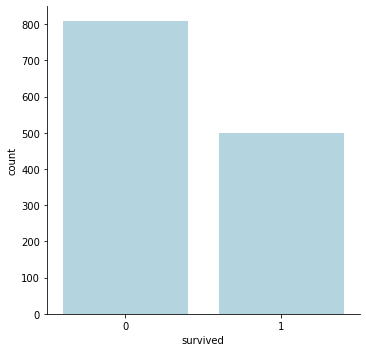

In [132]:
sns.catplot(x="survived", kind="count", color="lightblue", data=df);

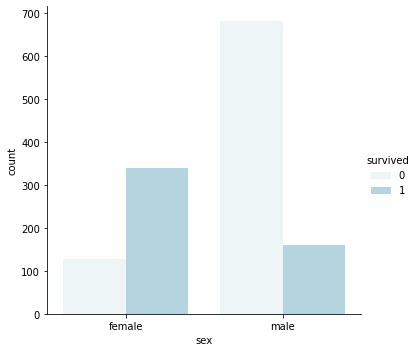

In [206]:
sns.catplot(x="sex", hue="survived", kind="count", color="lightblue", data=df);

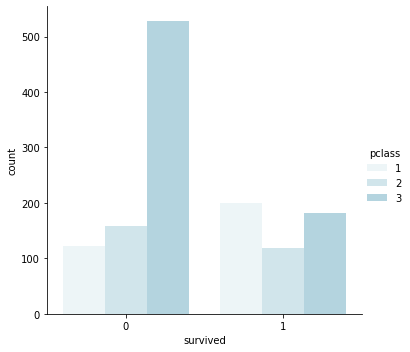

In [215]:
sns.catplot(x="survived", hue="pclass", kind="count", color="lightblue", data=df);

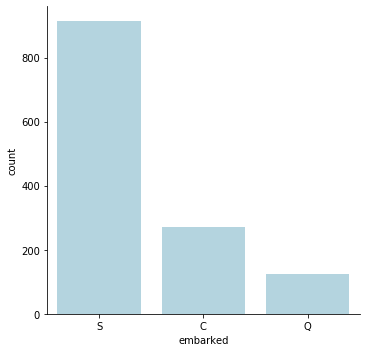

In [208]:
sns.catplot(x="embarked", kind="count", color="lightblue", data=df);

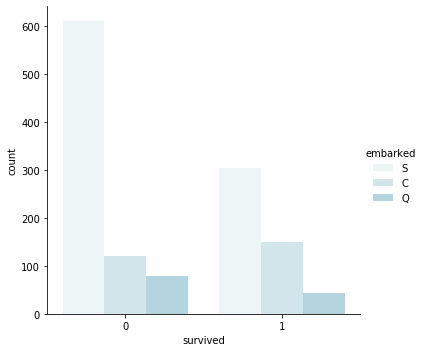

In [150]:
sns.catplot(x="survived", hue="embarked", kind="count", color="lightblue", data=df);

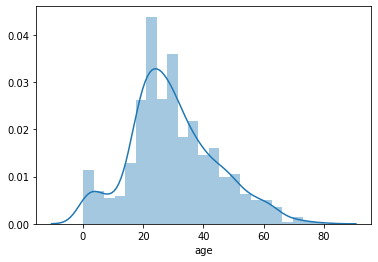

In [141]:
sns.distplot(df["age"]);

In [149]:
female_mean_age = int(round(df["age"][(df["sex"]=="female")].mean(),0))
male_mean_age = int(round(df["age"][(df["sex"]=="male")].mean(),0))
print("Average female age: {}".format(female_mean_age))
print("Average male age: {}".format(male_mean_age))

Average female age: 29
Average male age: 31


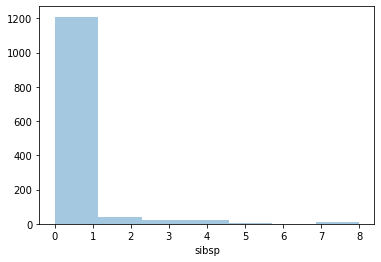

In [111]:
bins = len(df["sibsp"].unique())
sns.distplot(df["sibsp"], bins=bins, kde=False);

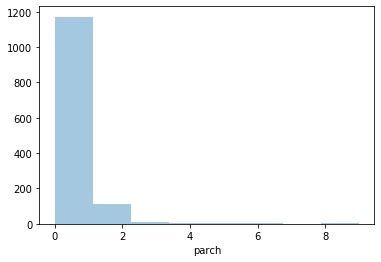

In [115]:
bins = len(df["parch"].unique())
sns.distplot(df["parch"], bins=bins, kde=False);

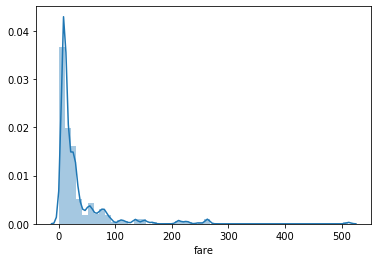

In [153]:
sns.distplot(df["fare"]);

In [161]:
fare_log = df["fare"][(df["fare"]!=0)]
fare_log = np.log10(fare_log)

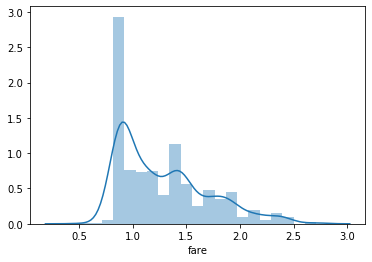

In [162]:
sns.distplot(fare_log);

# Data Processing

In [211]:
# from: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

# Extract titles
df["title"] = df["name"].str.extract(r'(Mrs|Mr|Master|Miss|Major|Rev|Dr|Ms|Mlle|Col|Capt|Mme|Countess|Don|Jonkheer)')

# Replacing all titles with mr, mrs, miss, master
def replace_titles(x):
    title=x['title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title
df['title']=df.apply(replace_titles, axis=1)

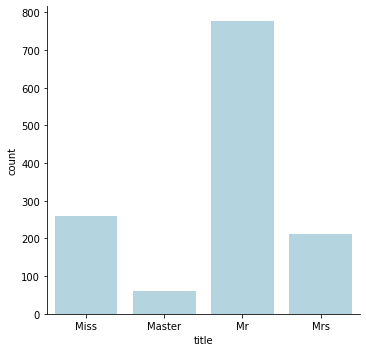

In [212]:
sns.catplot(x="title", kind="count", color="lightblue", data=df);